### Prediction on Readmission of Diabetic Patients

## Introduction

In recent years, predicting patient readmissions at Karanda Mission Hospital has become a significant focus in healthcare analytics as an institution. Hospital readmissions can indicate the quality of patient care, and minimizing unnecessary readmissions is critical not just for enhancing patient outcomes but also for optimizing healthcare resources and reducing costs.

This notebook explores a dataset containing various patient attributes, including demographic information, medical history, laboratory procedures, and treatments from both Karanda(KMH)catchment and across Zimbabwe. The primary objective is to build a predictive model that can determine whether a patient is likely to be readmitted to the KMH hospital within a specific timeframe after discharge.

The attributes in the dataset include:

- **Age**: The age of the patient.
- **Time in Hospital**: The duration of the hospital stay.
- **Lab Procedures**: The number of laboratory procedures performed.
- **Procedures**: The number of additional medical procedures undertaken.
- **Medications**: The number of medications prescribed.
- **Outpatient Visits**: The number of outpatient appointments that took place.
- **Inpatient Visits**: The number of inpatient visits before the admission in question.
- **Emergency Visits**: The number of emergency situations faced by the patient.
- **Medical Specialty**: The medical specialty related to the patient's treatment.
- **Diagnosis Codes (diag_1, diag_2, diag_3)**: Codes that represent the diagnosis associated with the patient’s condition.
- **Glucose Test**: Results from glucose testing.
- **A1C Test**: Results from A1C blood test indicating average blood sugar levels.
- **Change**: Whether any change was noted in the patient's condition.
- **Diabetes Medication**: Whether the patient was on medication specifically for diabetes.
- **Readmitted**: The target variable indicating if the patient was readmitted (Yes/No).

#### Install necessarry library

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Karanda-Diabetic-Patients.csv')

In [5]:
df.head()

,Encounter ID,EHR#,Race,Gender,Age,time_in_hospital,Speciality,Lab Procedures,# Of Procedures,# of Medication,...,Citoglipton,Insulin,Glyburide-metformin,glipizide-metformin,Glimepiride-pioglitazone,metformin-rosiglitazone,Metformin-pioglitazone,change,DiabetesMed,Readmitted
0,2278392,8222157,Shona,Female,[0-10),1,Pediatrics-Endocrinology,41,0,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Shona,Female,[10-20),3,?,59,0,18,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,Ndebele,Female,[20-30),2,?,11,5,13,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Shona,Male,[30-40),2,?,44,1,16,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Shona,Male,[40-50),1,?,51,0,8,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [6]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
Encounter ID,2278392,149190,64410,500364,16680,35754,55842,63768,12522,15738
EHR#,8222157,55629189,86047875,82442376,42519267,82637451,84259809,114882984,48330783,63555939
Race,Shona,Shona,Ndebele,Shona,Shona,Shona,Shona,Shona,Shona,Shona
Gender,Female,Female,Female,Male,Male,Male,Male,Male,Female,Female
Age,[0-10),[10-20),[20-30),[30-40),[40-50),[50-60),[60-70),[70-80),[80-90),[90-100)
time_in_hospital,1,3,2,2,1,3,4,5,13,12
Speciality,Pediatrics-Endocrinology,?,?,?,?,?,?,?,?,InternalMedicine
Lab Procedures,41,59,11,44,51,31,70,73,68,33
# Of Procedures,0,0,5,1,0,6,1,0,2,3
# of Medication,1,18,13,16,8,16,21,12,28,18


## Data Preprocessing

### Checking for missing values

Check for missing values in each column of a DataFrame. To understanding the extent and location of missing values which is an essential step in data preprocessing. Missing values may need to be handled appropriately (e.g., imputed, filled in, or removed) before proceeding with analyses, model training, or visualization.

In [24]:
print("Missing values in each column:\n", df.isnull().sum())

Missing values in each column:
 Encounter ID                    0
EHR#                            0
Race                            0
Gender                          0
Age                             0
time_in_hospital                0
medical_specialty               0
n_lab_procedures                0
n_procedures                    0
n_medications                   0
n_outpatient                    0
n_inpatient                     0
diag_1                          0
diag_2                          0
diag_3                          0
 # of diagnoses                 0
glucose_test                96420
A1Ctest                     84748
Metformin                       0
Repaglinide                     0
Nateglinide                     0
Chlorpropamide                  0
Glimepiride                     0
Acetohexamide                   0
Glipizide                       0
Glyburide                       0
Tolbutamide                     0
Pioglitazone                    0
Rosiglitazone   

### Display basic info and check for missing values

In [27]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 44 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Encounter ID              101766 non-null  int64 
 1   EHR#                      101766 non-null  int64 
 2   Race                      101766 non-null  object
 3   Gender                    101766 non-null  object
 4   Age                       101766 non-null  object
 5   time_in_hospital          101766 non-null  int64 
 6   medical_specialty         101766 non-null  object
 7   n_lab_procedures          101766 non-null  int64 
 8   n_procedures              101766 non-null  int64 
 9   n_medications             101766 non-null  int64 
 10  n_outpatient              101766 non-null  int64 
 11  n_inpatient               101766 non-null  int64 
 12  diag_1                    101766 non-null  object
 13  diag_2                    101766 non-null  object
 14  diag

## Exploratory Data Analysis

Exploratory Data Analysis (EDA) is a critical step in the data analysis process, where you explore and understand your dataset’s characteristics, patterns, and structure before applying any statistical modeling or machine learning techniques.The key goals of EDA include:

-**Understanding Data Distribution**: Assess the frequency and distribution of different values or categories in your dataset.

-**Identifying Patterns**: Discover relationships, trends, and patterns in the data.

-**Detecting Outliers**: Identify anomalous data points or outliers that may affect the results of modeling.

-**Checking Assumptions**: Validate assumptions regarding the data that may be required for certain statistical tests or models.

-**Formulating Hypotheses**: Generate hypotheses based on initial observations for further analysis.

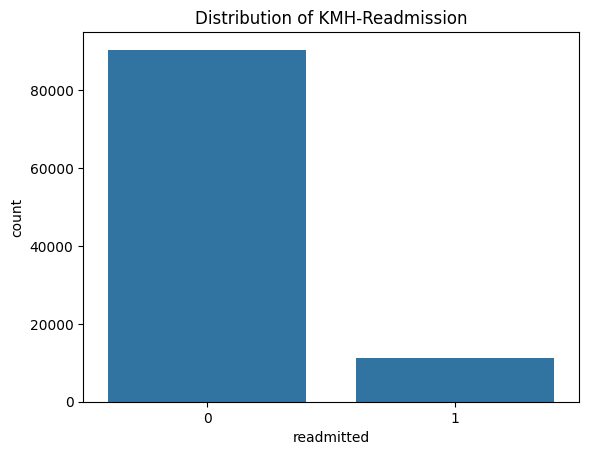

In [37]:
sns.countplot(x='readmitted', data=df)
plt.title('Distribution of KMH-Readmission')
plt.show()

### Checking for unique values in categorical columns

In [46]:
print(df['Race'].value_counts())
print(df['Gender'].value_counts())
print(df['A1Ctest'].value_counts())
print(df['glucose_test'].value_counts())

Race
Shona                 76088
Ndebele               19210
?                      2273
Whites/Coloureds       2037
Other_EthnicGroups     1506
Asian                   641
Shona                    11
Name: count, dtype: int64
Gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: count, dtype: int64
A1Ctest
>8      8216
Norm    4990
>7      3812
Name: count, dtype: int64
glucose_test
Norm    2597
>200    1485
>300    1264
Name: count, dtype: int64



#### Map column names to our expected features

In [42]:
column_mapping = {
    'time_in_hospital': 'time_in_hospital',
    'Speciality': 'medical_specialty',
    'Lab Procedures': 'n_lab_procedures',
    '# Of Procedures': 'n_procedures',
    '# of Medication': 'n_medications',
    'Outpatient #': 'n_outpatient',
    'Inpatient #': 'n_inpatient',
    'Diagnosis 1': 'diag_1',
    'Diagnosis 2': 'diag_2',
    'Diagnosis 3': 'diag_3',
    'max_glu_serum': 'glucose_test',
    'A1Cresult': 'A1Ctest',
    'DiabetesMed': 'diabetes_med',
    'Readmitted': 'readmitted'
}

In [8]:
df = df.rename(columns=column_mapping)  # Rename columns

#### Prepare target variable (convert to binary)

In [44]:
df['readmitted'] = df['readmitted'].apply(lambda x: 1 if str(x).lower() in ['yes', '1', 'true', '<30'] else 0)

### Define features and target

In [10]:
X = df.drop(['readmitted', 'Encounter ID', 'EHR#'], axis=1)  # Remove ID columns
y = df['readmitted']

 ### Split Dataset.
Datasets are split into training and testing subsets

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:

numeric_features = ['time_in_hospital', 'n_lab_procedures', 'n_procedures',      # Categorizing features into categorical and numeric
                   'n_medications', 'n_outpatient', 'n_inpatient']
categorical_features = ['Race', 'Gender', 'Age', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3',
                       'glucose_test', 'A1Ctest', 'change', 'diabetes_med']

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Define your feature columns
numeric_features = ['time_in_hospital', 'n_medications']  # numerical columns
categorical_features = ['Gender', 'diabetes_med']  # categorical columns

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

In [14]:
# Build and train model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=150,
        max_depth=7,
        random_state=42,
        class_weight='balanced'
    ))
])

model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['time_in_hospital',
                                                   'n_medications']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Gender',
                                                   'diabetes_med'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=7,
                                        n_estimators=150, random_state=42))])

In [15]:
print("Columns in X_train:", X_train.columns.tolist())

Columns in X_train: ['Race', 'Gender', 'Age', 'time_in_hospital', 'medical_specialty', 'n_lab_procedures', 'n_procedures', 'n_medications', 'n_outpatient', 'n_inpatient', 'diag_1', 'diag_2', 'diag_3', ' # of diagnoses', 'glucose_test', 'A1Ctest', 'Metformin', 'Repaglinide', 'Nateglinide', 'Chlorpropamide', 'Glimepiride', 'Acetohexamide', 'Glipizide', 'Glyburide', 'Tolbutamide', 'Pioglitazone', 'Rosiglitazone', 'Acarbose', 'Miglitol', 'Troglitazone', 'Tolazamide', 'Examide', 'Citoglipton', 'Insulin', 'Glyburide-metformin', 'glipizide-metformin', 'Glimepiride-pioglitazone', 'metformin-rosiglitazone', 'Metformin-pioglitazone', 'change', 'diabetes_med']


In [16]:
print(X_train.head())
print(X_train.dtypes)  # To check the data types of each column

          Race  Gender      Age  time_in_hospital medical_specialty  \
24079    Shona  Female  [70-80)                 4  InternalMedicine   
98079    Shona    Male  [50-60)                 1                 ?   
6237     Shona    Male  [80-90)                 4                 ?   
72208    Shona    Male  [80-90)                 3                 ?   
33075  Ndebele  Female  [70-80)                11        Nephrology   

       n_lab_procedures  n_procedures  n_medications  n_outpatient  \
24079                48             0             11             0   
98079                42             0              5             0   
6237                 44             0             10             0   
72208                54             0              8             0   
33075                35             3             23             0   

       n_inpatient  ... Examide Citoglipton Insulin  Glyburide-metformin  \
24079            0  ...      No          No      No                   No   


In [17]:
print(X_train.columns.tolist())

['Race', 'Gender', 'Age', 'time_in_hospital', 'medical_specialty', 'n_lab_procedures', 'n_procedures', 'n_medications', 'n_outpatient', 'n_inpatient', 'diag_1', 'diag_2', 'diag_3', ' # of diagnoses', 'glucose_test', 'A1Ctest', 'Metformin', 'Repaglinide', 'Nateglinide', 'Chlorpropamide', 'Glimepiride', 'Acetohexamide', 'Glipizide', 'Glyburide', 'Tolbutamide', 'Pioglitazone', 'Rosiglitazone', 'Acarbose', 'Miglitol', 'Troglitazone', 'Tolazamide', 'Examide', 'Citoglipton', 'Insulin', 'Glyburide-metformin', 'glipizide-metformin', 'Glimepiride-pioglitazone', 'metformin-rosiglitazone', 'Metformin-pioglitazone', 'change', 'diabetes_med']


#### Evaluate model

In [47]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f"\nROC AUC Score: {roc_auc_score(y_test, y_proba):.2f}")

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.51      0.65     18069
           1       0.13      0.57      0.21      2285

    accuracy                           0.51     20354
   macro avg       0.51      0.54      0.43     20354
weighted avg       0.82      0.51      0.60     20354


ROC AUC Score: 0.55


 #### Confusion matrix
 Confusion matrix,a visualization technic which is a performance measurement for my machine learning classification model.

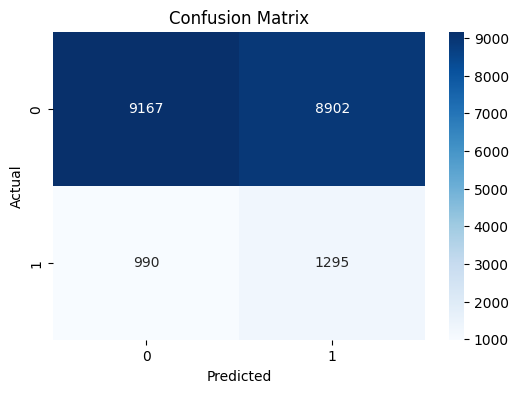

In [19]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Fit the model and assign it to best_model
best_model = model 
best_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['time_in_hospital',
                                                   'n_medications']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Gender',
                                                   'diabetes_med'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=7,
                                        n_estimators=150, random_state=42))])

In [21]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['time_in_hospital',
                                                   'n_medications']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Gender',
                                                   'diabetes_med'])])),
                ('classifier', RandomForestClassifier())])

In [48]:
# Save model
import joblib
joblib.dump(model, 'readmission_model.pkl')
print("Model saved as 'readmission_model.pkl'")

Model saved as 'readmission_model.pkl'
